In [1]:
import pandas as pd
import seaborn as sns

# Lets us import sparse matrices
import scipy.io
import scipy.sparse
import csv


#from lets us import only a part of that package rather than the entire thing. 
#We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

#In order for plots to appear in the notebook we need this:
%matplotlib inline

In [9]:
data_dir = data_dir = "/oasis/tscc/scratch/cshl_2018/dropseqtools_results_macosko/downsampled_100M/"
#Take a look at the string stored in the data_dir variable
data_dir
#prints out data_dir because it is the last line in the cell

'/oasis/tscc/scratch/cshl_2018/dropseqtools_results_macosko/downsampled_100M/'

In [13]:
#define function we are going to use later
def read_mtx_as_dataframe(mtx_file, columns_file, rows_file):
    """
    Reads a mtx file and returns a pandas dataframe.
    
    :param mtx_file: sparse matrix
    :param columns_file: tab-separated file containing column names
    :param rows_file: tab-separated file containing row names
    
    :return df: Pandas.DataFrame()
    """
    mat = scipy.io.mmread(mtx_file)
    columns = [
        row[0] for row in csv.reader(open(columns_file), delimiter="\t")
    ]
    rows = [
        row[0] for row in csv.reader(open(rows_file), delimiter="\t")
    ]
    df = pd.DataFrame(mat.todense(), columns=columns, index=rows)
    return df

In [10]:
counts_file = data_dir+"13_out_gene_exon_tagged_dge.txt"
counts_file

'/oasis/tscc/scratch/cshl_2018/dropseqtools_results_macosko/downsampled_100M/13_out_gene_exon_tagged_dge.txt'

In [12]:
#Store the dataframe with the name raw_counts
raw_counts = pd.read_table(data_dir+"13_out_gene_exon_tagged.dge.txt", index_col=0)

#Print the size of the dataframe (number of rows and columns)
print(raw_counts.shape)

#look at the first 5 rows
raw_counts.head()

(18615, 13000)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
cellranger_results = "/oasis/tscc/scratch/cshl_2018/cellranger_results_haber/"\
                    "Atlas1_batch1/outs/filtered_gene_bc_matrices/mm10/"

matrix = cellranger_results+"matrix.mtx"
columns = cellranger_results+"barcodes.tsv"
rows = cellranger_results+"genes.tsv"

atlas_counts = read_mtx_as_dataframe(matrix, columns, rows)
print(atlas_counts.shape)
atlas_counts.head()

(27998, 1595)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000089699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000109048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
raw_counts.head()

,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
genes_detected_per_cell = (raw_counts > 0).sum()
#makes true/false array and sums the non zero values for each row (= cell barcodes)
genes_detected_per_cell.head()

CTTGTGCGGGAA    5813
GGCCGCAGTCCG    5857
GATTGGGAGGCA    4619
GCGCAACTGCTC    5065
AGTCAAGCCCTC    4254
dtype: int64

In [29]:
#How many cells express at least 800 genes
(genes_detected_per_cell > 800).sum()
#1195 cells have more than 800 genes expressed
#be careful about setting too stringent cutoff!

1195

In [33]:
#How many cells express between 500 and 5000 cells
((genes_detectd_per_cell > 500) & (genes_detectd_per_cell < 5000)).sum()

2230

In [27]:
number_of_cells_with_genes = (raw_counts > 0).sum(axis=1)
#by default, summing of columns is performed (default is axis=0). To sum rows, set axis=1
number_of_cells_with_genes.head()

GENE
0610005C13Rik      7
0610007N19Rik     40
0610007P14Rik    504
0610008F07Rik      1
0610009B14Rik      6
dtype: int64

In [34]:
#select cells to keep based on number of genes detected per cell:
cells_to_keep = genes_detectd_per_cell > 500

In [37]:
counts_filtered_by_cell = raw_counts.T.loc[cells_to_keep].T
#switches rows and columns (because.loc operates on the index), subsets to cells to keep and switches rows and columns back
#.loc searches by the index. If true, it keeps it, if false it discards it
print(counts_filtered_by_cell.shape)
counts_filtered_by_cell.head()

(18615, 2233)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,GGGCGAGTGATG,GCGCGGGTACCG,TTTATTACGTTA,TGGCCGGGGGCG,GTAACCCCCCAT,GACCGGGGGCCA,GCGCGGCACCGG,CGCCCTACCACC,CCTCCTAGATGG,CATGTGCGGGAA
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#caluculate total number of cells
num_cells = len(counts_filtered_by_cell.columns)
num_cells

2233

In [43]:
#filter out genes that are expressed in less than 10% of the cells
#again be careful about what treshold you set for your experiment
genes_to_keep = (counts_filtered_by_cell > 0).sum(axis=1) > 0.1*num_cells
genes_to_keep.head()

GENE
0610005C13Rik    False
0610007N19Rik    False
0610007P14Rik     True
0610008F07Rik    False
0610009B14Rik    False
dtype: bool

In [44]:
counts_filt_by_cell_and_genes = counts_filtered_by_cell.loc[genes_to_keep]
print(counts_filt_by_cell_and_genes.shape)
counts_filt_by_cell_and_genes.head()

(3139, 2233)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,GGGCGAGTGATG,GCGCGGGTACCG,TTTATTACGTTA,TGGCCGGGGGCG,GTAACCCCCCAT,GACCGGGGGCCA,GCGCGGCACCGG,CGCCCTACCACC,CCTCCTAGATGG,CATGTGCGGGAA
GENE,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
0610009B22Rik,0,2,1,1,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009D07Rik,4,6,1,6,5,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,1
0610011F06Rik,0,1,1,0,2,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1110001A16Rik,4,1,0,2,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
save_dir = "/home/ucsd-train13/scratch/projects/macosko_downsampled_batch_1/processed_files/"
!mkdir -p $save_dir
counts_filt_by_cell_and_genes.to_csv(save_dir+"counts_filt_500genes_2233cells.csv")

(0, 2000)

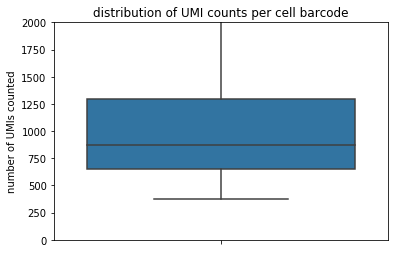

In [51]:
sns.boxplot(counts_filt_by_cell_and_genes.sum().values, orient = 'v')
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
plt.ylim([0,2000])
#boxplot

Text(0.5,1,'distribution of UMI counts per cell barcode')

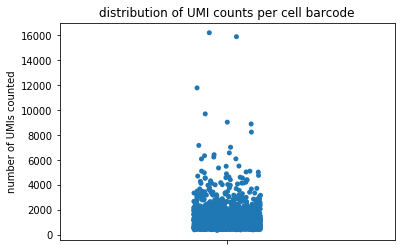

In [54]:
sns.stripplot(counts_filt_by_cell_and_genes.sum().values, orient = 'v', jitter=True)
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
#plt.ylim([0,2000])
#boxplot

Text(0.5,1,'distribution of UMI counts per cell barcode')

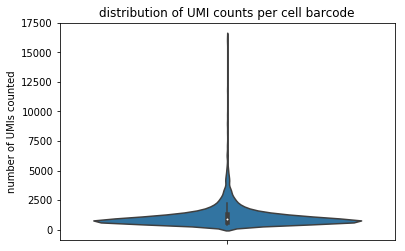

In [59]:
sns.violinplot(counts_filt_by_cell_and_genes.sum().values, orient = 'v', jitter=True)
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
#plt.ylim([0,10000])
#boxplot